In [1]:
import ROOT
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
data_h_rest = pd.read_csv('particle_momentum.csv')
data_Z_rest = pd.read_csv('transformed_momentum(ZRestFrame).csv')

In [3]:
import pandas as pd

# Input file
input_file = "particle_velocity.csv"  # Replace with your actual file name

# Output file
output_file = "z_boson_velocity.csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
z_boson_data = data[data["Particle"] == "Z Boson"]

# Select required columns: Event, Px, Py, Pz
z_boson_velocity = z_boson_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
z_boson_velocity.to_csv(output_file, index=False)

print(f"Z boson momentum data saved to {output_file}.")


Z boson momentum data saved to z_boson_velocity.csv.


In [4]:
import pandas as pd

# Read the input CSV file
data = pd.read_csv("particle_velocity.csv")

# Filter the events containing Z Boson, Higgs, Electron+, and Photon
relevant_events = data[
    (data['Particle'] == 'Electron-') &
    (data['Event'].isin(data[data['Particle'] == 'Higgs']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Electron+']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Photon']['Event']))
]['Event'].unique()

# Filter the Electron- momentum for these events
Z_velocities = data[(data['Event'].isin(relevant_events)) & (data['Particle'] == 'Z Boson')]

# Select relevant columns (Event, Px, Py, Pz)
Z_velocity = Z_velocities[['Event', 'Vx', 'Vy', 'Vz']]

# Save the filtered data to a new CSV file
Z_velocity.to_csv("z_velocity_SelectedEvents.csv", index=False)

print("Filtered Electron- momentum data saved to 'z_velocity_SelectedEvents.csv'")

Filtered Electron- momentum data saved to 'z_velocity_SelectedEvents.csv'


In [5]:
import pandas as pd

# Input file
input_file = "transformed_velocity(ZRestFrame).csv"  # Replace with your actual file name

# Output file
output_file = "em_velocity(ZRestFrame).csv"

# Read the data
data = pd.read_csv(input_file)

# Filter rows for Z Bosons
em_data = data[data["Particle"] == "Electron-"]

# Select required columns: Event, Px, Py, Pz
em_velocity = em_data[["Event", "Vx", "Vy", "Vz"]]

# Save the extracted data to a CSV file
em_velocity.to_csv(output_file, index=False)

print(f"Electron momentum data saved to {output_file}.")

Electron momentum data saved to em_velocity(ZRestFrame).csv.


In [6]:
import pandas as pd

# Read the input CSV file
data = pd.read_csv("transformed_velocity(ZRestFrame).csv")

# Filter the events containing Z Boson, Higgs, Electron+, and Photon
relevant_events = data[
    (data['Particle'] == 'Z Boson') &
    (data['Event'].isin(data[data['Particle'] == 'Higgs']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Electron+']['Event'])) &
    (data['Event'].isin(data[data['Particle'] == 'Photon']['Event']))
]['Event'].unique()

# Filter the Electron- momentum for these events
electron_minus_velocities = data[(data['Event'].isin(relevant_events)) & (data['Particle'] == 'Electron-')]

# Select relevant columns (Event, Px, Py, Pz)
em_velocity = electron_minus_velocities[['Event', 'Vx', 'Vy', 'Vz']]

# Save the filtered data to a new CSV file
em_velocity.to_csv("em_velocity_SelectedEvents(ZRestFrame).csv", index=False)

print("Filtered Electron- momentum data saved to 'em_velocity_SelectedEvents(ZRestFrame).csv'")

Filtered Electron- momentum data saved to 'em_velocity_SelectedEvents(ZRestFrame).csv'


In [7]:
import numpy as np
import pandas as pd

# Read the electron and Z boson velocity data
electron_data = pd.read_csv("em_velocity(ZRestFrame).csv")
z_boson_data = pd.read_csv("z_boson_velocity.csv")

# Initialize an empty list to store the angles
angles = []

# Loop through each event to compute the angle
for i, event in electron_data.iterrows():
    # Get the velocities of the electron and Z boson for the current event
    v_electron = np.array([event['Vx'], event['Vy'], event['Vz']])
    z_event = z_boson_data.iloc[i]
    v_z_boson = np.array([z_event['Vx'], z_event['Vy'], z_event['Vz']])
    
    # Calculate the dot product and magnitudes of the vectors
    dot_product = np.dot(v_electron, v_z_boson)
    mag_electron = np.linalg.norm(v_electron)
    mag_z_boson = np.linalg.norm(v_z_boson)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (mag_electron * mag_z_boson)
    
    # Calculate the angle in radians and then convert to degrees
    angle_rad = np.arccos(cos_theta)
    angle_deg = np.degrees(angle_rad)
    
    # Append the angle to the list
    angles.append([electron_data.iloc[i]['Event'], angle_deg])

# Create a DataFrame for the angles
angle_df = pd.DataFrame(angles, columns=['Event', 'Angle (degrees)'])

# Save the angles to a CSV file
angle_df.to_csv('angles_Z&em.csv', index=False)


In [8]:
import pandas as pd
import numpy as np

# Read the input CSV files
z_boson_data = pd.read_csv("z_velocity_SelectedEvents.csv")
electron_data = pd.read_csv("em_velocity_SelectedEvents(ZRestFrame).csv")

# Merge the data based on the Event column
merged_data = pd.merge(z_boson_data, electron_data, on="Event", suffixes=("_z", "_e"))

# Calculate the angle between Z Boson and Electron
# Dot product: Vz \u00b7 Ve = Vx_z * Vx_e + Vy_z * Vy_e + Vz_z * Vz_e
# Magnitudes: |Vz| = sqrt(Vx_z^2 + Vy_z^2 + Vz_z^2), |Ve| = sqrt(Vx_e^2 + Vy_e^2 + Vz_e^2)
merged_data["Dot_Product"] = (
    merged_data["Vx_z"] * merged_data["Vx_e"] +
    merged_data["Vy_z"] * merged_data["Vy_e"] +
    merged_data["Vz_z"] * merged_data["Vz_e"]
)
merged_data["Magnitude_Z"] = np.sqrt(
    merged_data["Vx_z"]**2 + merged_data["Vy_z"]**2 + merged_data["Vz_z"]**2
)
merged_data["Magnitude_E"] = np.sqrt(
    merged_data["Vx_e"]**2 + merged_data["Vy_e"]**2 + merged_data["Vz_e"]**2
)
merged_data["Cos_Theta"] = merged_data["Dot_Product"] / (merged_data["Magnitude_Z"] * merged_data["Magnitude_E"])
merged_data["Angle"] = np.arccos(merged_data["Cos_Theta"]) * (180 / np.pi)  # Convert to degrees

# Save the result to a new CSV file
merged_data[["Event", "Angle"]].to_csv("z_boson_electron_angles(SelectedEvents).csv", index=False)

print("Angles between Z Boson and Electron saved to 'z_boson_electron_angles(SelectedEvents).csv'")


Angles between Z Boson and Electron saved to 'z_boson_electron_angles(SelectedEvents).csv'


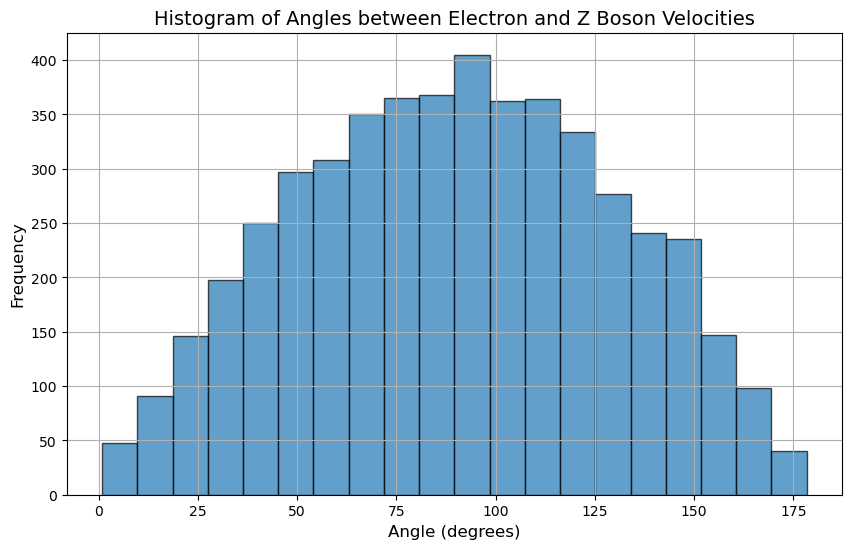

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the angles CSV file (assuming it was generated by the previous code)
angles_df = pd.read_csv("angles_Z&em.csv")

# Extract the angles for plotting
angles = angles_df['Angle (degrees)']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(angles, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Angle (degrees)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angles between Electron and Z Boson Velocities', fontsize=14)

# Show grid
plt.grid(True)

# Display the plot
plt.show()


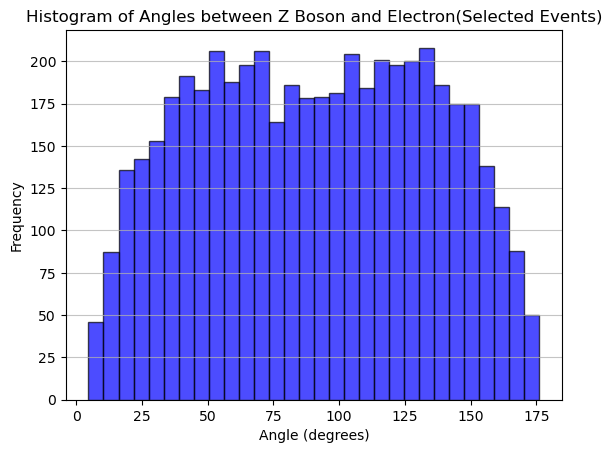

Histogram of angles plotted and saved to 'angle_histogram_from_csv.png'


In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the input CSV file containing angles
data = pd.read_csv("z_boson_electron_angles(SelectedEvents).csv")

# Plot the histogram of angles
plt.hist(data["Angle"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Angles between Z Boson and Electron(Selected Events)")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig("angle_histogram_from_csv.png")
plt.show()

print("Histogram of angles plotted and saved to 'angle_histogram_from_csv.png'")
